#  ARIMA
-  Auto-Arima

# AutoRegressive Integrated Moving Average (ARIMA) model
ARIMA is one of the time series forecasting models. It is a general class of models that includes different varieties.
#### A standard notation is used of ARIMA(p,d,q) .
- p: The number of lag observations included in the model, also called the lag order.
- d: The number of times that the raw observations are differenced, also called the degree of differencing.
- q: The size of the moving average window, also called the order of moving average.
- The values of p,q, and d, can  also finding by auto arima model, which find best values of the p,d,and q.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [2]:
data = pd.read_csv("shampoo.csv",index_col = 'Month')
data.index = pd.to_datetime(data.index)
print("The shape of the data :",data.shape)
data.head()

The shape of the data : (36, 1)


,Sales
Month,
1901-01-01,266.0
1901-02-01,145.9
1901-03-01,183.1
1901-04-01,119.3
1901-05-01,180.3


In [3]:
# checking for missing values
data.isnull().sum()

Sales    0
dtype: int64

In [4]:
# trian and test set
train = data[:round(len(data) * 0.9)]
test = data[round(len(data) * 0.9):]
print(f"Shape of train data : {train.shape}")
print(f"Shape of test data : {test.shape}")

Shape of train data : (32, 1)
Shape of test data : (4, 1)


In [5]:
train.head()

,Sales
Month,
1901-01-01,266.0
1901-02-01,145.9
1901-03-01,183.1
1901-04-01,119.3
1901-05-01,180.3


In [6]:
test.head()

,Sales
Month,
1903-09-01,682.0
1903-10-01,475.3
1903-11-01,581.3
1903-12-01,646.9


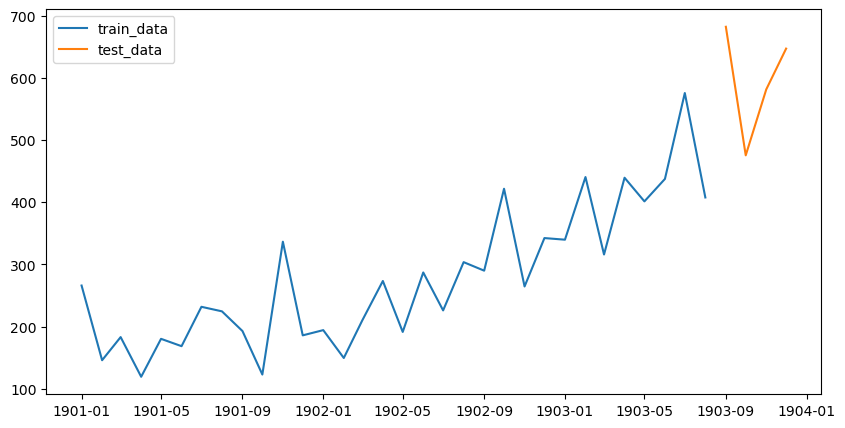

In [7]:
# univarite time series plot

plt.figure(figsize = (10,5))
plt.plot(train, label = 'train_data')
plt.plot(test,label = 'test_data')
plt.legend();

### model training with  auto_arima modules

In [8]:
#building the model
# from pyramid.arima import auto_arima
from pmdarima.arima import auto_arima
model = auto_arima(train, trace=True, error_action='ignore', suppress_warnings=True)
model.fit(train)

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.18 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=373.875, Time=0.02 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=356.931, Time=0.05 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=355.668, Time=0.04 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=371.947, Time=0.01 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=353.854, Time=0.06 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=355.848, Time=0.09 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.09 sec
 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.13 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=357.047, Time=0.05 sec
 ARIMA(1,1,1)(0,0,0)[0]             : AIC=356.746, Time=0.03 sec

Best model:  ARIMA(1,1,1)(0,0,0)[0] intercept
Total fit time: 0.737 seconds


ARIMA(order=(1, 1, 1), scoring_args={}, suppress_warnings=True)

### prediction on train data

In [9]:
# forecasting on test data
forecast = model.predict(n_periods=len(test))
forecast = pd.DataFrame(forecast,index = test.index,columns=['Prediction'])
forecast.head()

,Prediction
Month,
1903-09-01,512.929159
1903-10-01,480.054585
1903-11-01,508.950218
1903-12-01,510.237636


### prediction on test data

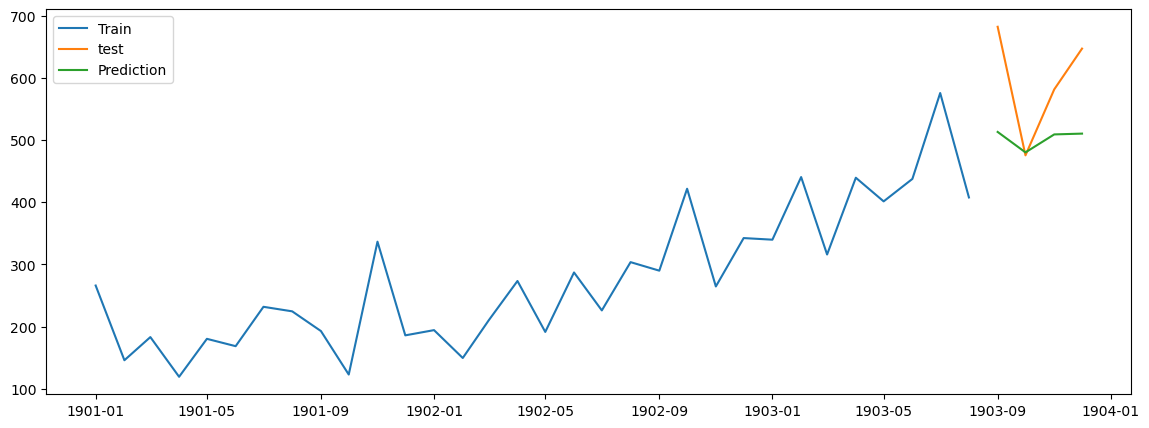

In [10]:
#plot the predictions for test data
plt.figure(figsize = (14,5))
plt.plot(train, label='Train')
plt.plot(test, label='test')
plt.plot(forecast, label='Prediction')
plt.legend()
plt.show()

### Accuracy Measurement
Root mean squre (rms) commonly used to accuracy metrics to judge forecasts.

In [11]:
#calculate rmse
from math import sqrt
from sklearn.metrics import mean_squared_error
rms = sqrt(mean_squared_error(test,forecast))
print("The root square mean erro :",rms)
print("The mean value of  the data: ",data.mean())

The root square mean erro : 114.58473723841028
The mean value of  the data:  Sales    312.6
dtype: float64
